### Import libraries

In [2]:
import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-m5hex5od
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-m5hex5od
  Resolved https://github.com/tensorflow/docs to commit bbc0b9c70fc0bd4411793d1b0bcc56ef1dbc2405
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.11.18.43811-py3-none-any.whl size=182608 sha256=4b757f6394af2ba93145190d77cf8bb3aac3672fe40a9706fbbce73a75246079
  Stored in directory: /tmp/pip-ephem-wheel-cache-q483nx9i/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


### Installing and importing tensorflow_docs
`pip install git+https://github.com/tensorflow/docs`

In [5]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [6]:
keras.__version__

'3.5.0'

### Loading dataset
#### Medical Cost Personal Datasets
Source: https://www.kaggle.com/mirichoi0218/insurance

Datafields:

* age: age of primary beneficiary

* sex: insurance contractor gender (female, male)

* bmi: Body mass index, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking (yes, no)

* region: the beneficiary's residential area in the US (northeast, southeast, southwest, northwest)

* charges: Individual medical costs billed by health insurance

In [8]:
data = pd.read_csv('sample_data/insurance.csv')

data.sample(10)

,age,sex,bmi,children,smoker,region,charges
815,20,female,31.460,0,no,southeast,1877.92940
870,50,male,36.200,0,no,southwest,8457.81800
1150,18,female,30.305,0,no,northeast,2203.73595
1090,47,male,36.190,0,yes,southeast,41676.08110
628,58,male,38.000,0,no,southwest,11365.95200
1047,22,male,52.580,1,yes,southeast,44501.39820
1188,43,female,25.270,1,yes,northeast,21771.34230
738,23,male,31.730,3,yes,northeast,36189.10170
1225,33,female,39.820,1,no,southeast,4795.65680
1118,33,male,35.750,1,yes,southeast,38282.74950


In [9]:
data.shape

(1338, 7)

In [10]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
data[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [12]:
data['sex'].value_counts()

,count
sex,
male,676
female,662


In [13]:
data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [14]:
data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


### Visualizing Dataset

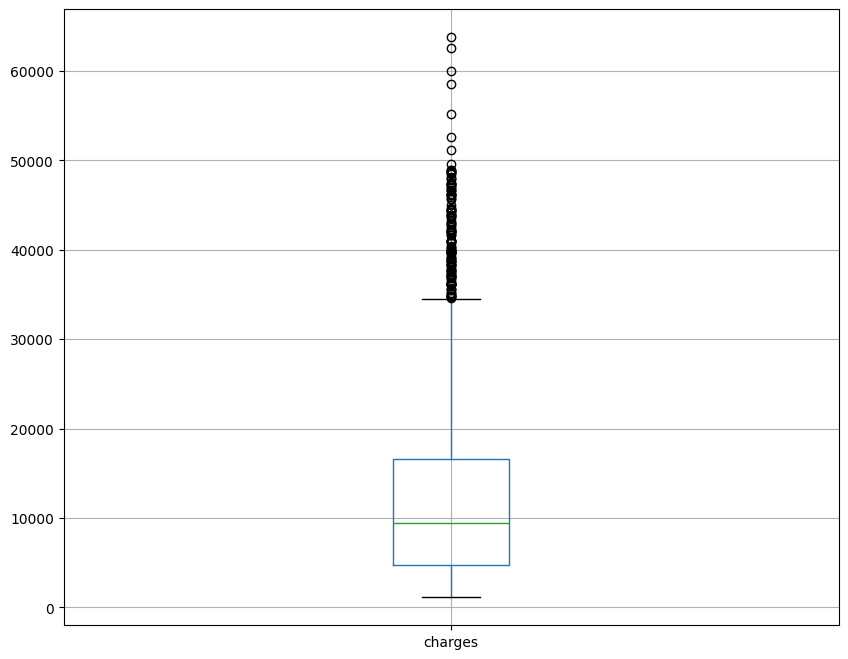

In [15]:
plt.figure(figsize=(10, 8))

data.boxplot('charges')

plt.show()

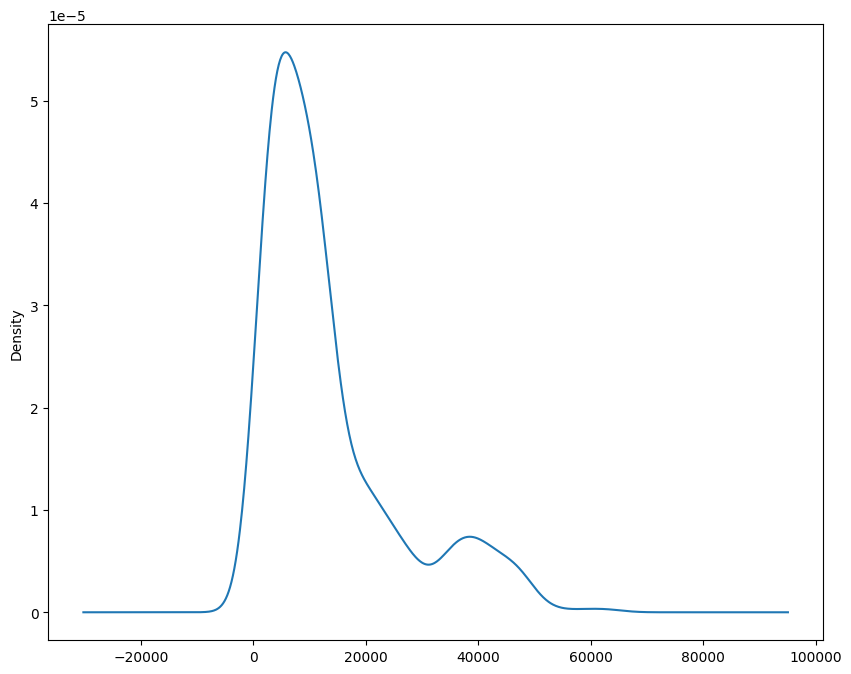

In [16]:
plt.figure(figsize=(10, 8))

data['charges'].plot.kde()

plt.show()

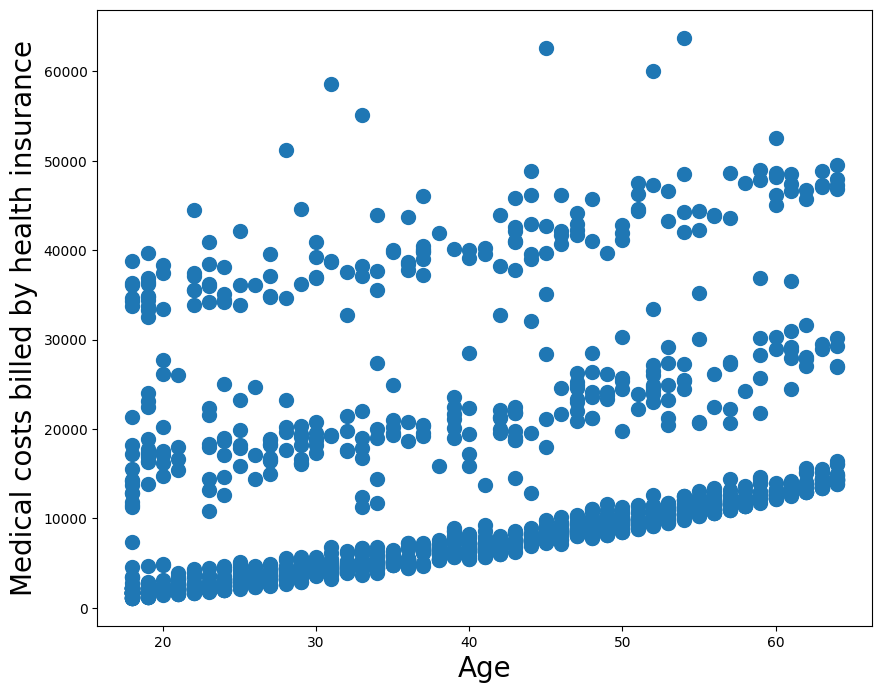

In [18]:
plt.figure(figsize=(10, 8))

plt.scatter(data['age'], data['charges'], s=100)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Medical costs billed by health insurance', fontsize=20)
plt.show()

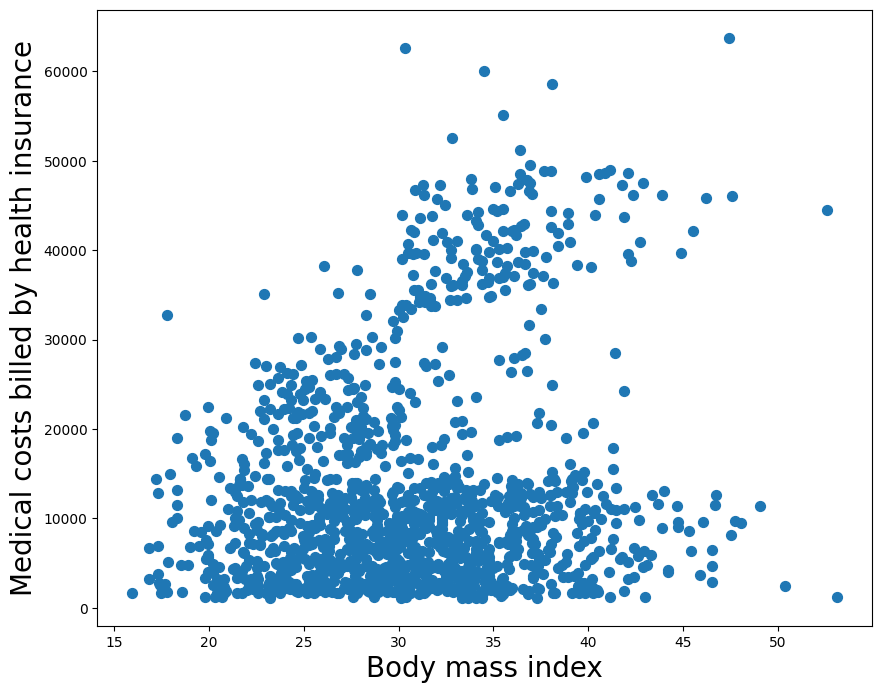

In [20]:
plt.figure(figsize=(10, 8))

plt.scatter(data['bmi'], data['charges'], s=50)

plt.xlabel('Body mass index', fontsize=20)
plt.ylabel('Medical costs billed by health insurance', fontsize=20)
plt.show()

In [ ]:
data['sex'].replace(gender_dict, inplace=True)

In [21]:
data_corr = data.corr()

data_corr

ValueError: could not convert string to float: 'female'

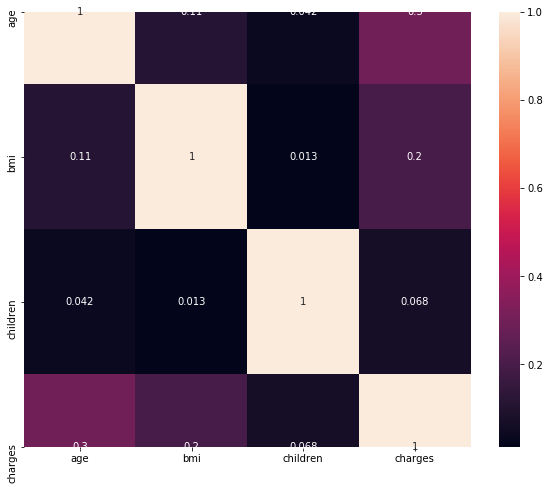

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

In [48]:
features = data.drop('charges', axis=1)

target = data[['charges']]

In [49]:
features.sample(10)

,age,sex,bmi,children,smoker,region
737,26,male,23.700,2,no,southwest
653,45,female,36.300,2,no,southeast
654,59,female,35.200,0,no,southeast
453,20,male,29.735,0,no,northwest
204,46,male,22.300,0,no,southwest
28,23,male,17.385,1,no,northwest
131,61,female,22.040,0,no,northeast
904,60,female,35.100,0,no,southwest
1322,62,male,38.830,0,no,southeast
590,58,female,29.000,0,no,southwest


In [50]:
target.sample(10)

,charges
1075,4562.84210
620,3659.34600
931,6238.29800
126,17081.08000
1077,2102.26470
327,42760.50220
966,23967.38305
176,6455.86265
41,4949.75870
1330,12629.16560


In [51]:
categorical_features = features[['sex', 'smoker', 'region']].copy()

categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [52]:
numeric_features = features.drop(['sex', 'smoker', 'region'], axis=1)

numeric_features.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [53]:
gender_dict = {'female':0, 'male':1}

categorical_features['sex'].replace(gender_dict, inplace=True)

categorical_features.head()

<ipython-input-53-cdee2bef948d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_features['sex'].replace(gender_dict, inplace=True)
<ipython-input-53-cdee2bef948d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical_features['sex'].replace(gender_dict, inplace=True)


,sex,smoker,region
0,0,yes,southwest
1,1,no,southeast
2,1,no,southeast
3,1,no,northwest
4,1,no,northwest


In [54]:
smoker_dict = {'no':0, 'yes':1}

categorical_features['smoker'].replace(smoker_dict, inplace=True)

categorical_features.head()

<ipython-input-54-afaa22ccbebd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_features['smoker'].replace(smoker_dict, inplace=True)
<ipython-input-54-afaa22ccbebd>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical_features['smoker'].replace(smoker_dict, inplace=True)


,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


One Hot Encoding

In [55]:
categorical_features = pd.get_dummies(categorical_features, columns=['region'])

categorical_features.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,False,False,False,True
1,1,0,False,False,True,False
2,1,0,False,False,True,False
3,1,0,False,True,False,False
4,1,0,False,True,False,False


In [56]:
numeric_features.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


Standardization


In [57]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


In [58]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,False,False,False,True
1,-1.509965,0.509621,-0.078767,1,0,False,False,True,False
2,-0.797954,0.383307,1.580926,1,0,False,False,True,False
3,-0.441948,-1.305531,-0.908614,1,0,False,True,False,False
4,-0.513149,-0.292556,-0.908614,1,0,False,True,False,False


In [59]:
processed_features.shape

(1338, 9)

In [60]:
target.head(10)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960
7,7281.50560
8,6406.41070
9,28923.13692


In [61]:
processed_data = pd.concat([processed_features, target], axis=1,
                            sort=False)

processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,False,False,False,True,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,False,False,True,False,1725.55230
2,-0.797954,0.383307,1.580926,1,0,False,False,True,False,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,False,True,False,False,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,False,True,False,False,3866.85520


In [63]:
processed_data.to_csv('sample_data/insurance_processed.csv', index=False)

### Splitting dataset into training and testing data

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state=1)

In [65]:
x_train.shape

(1070, 9)

In [66]:
x_test.shape

(268, 9)

### Building model with relu activation function

In [67]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [68]:
model_relu_64 = build_model()

model_relu_64.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

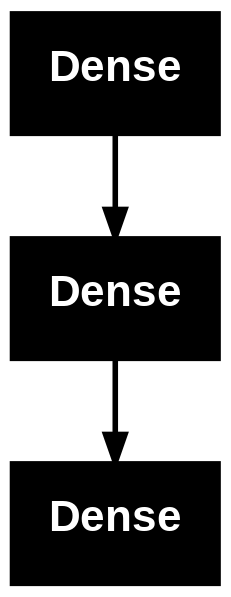

In [69]:
keras.utils.plot_model(model_relu_64, 'model_relu_64.png')

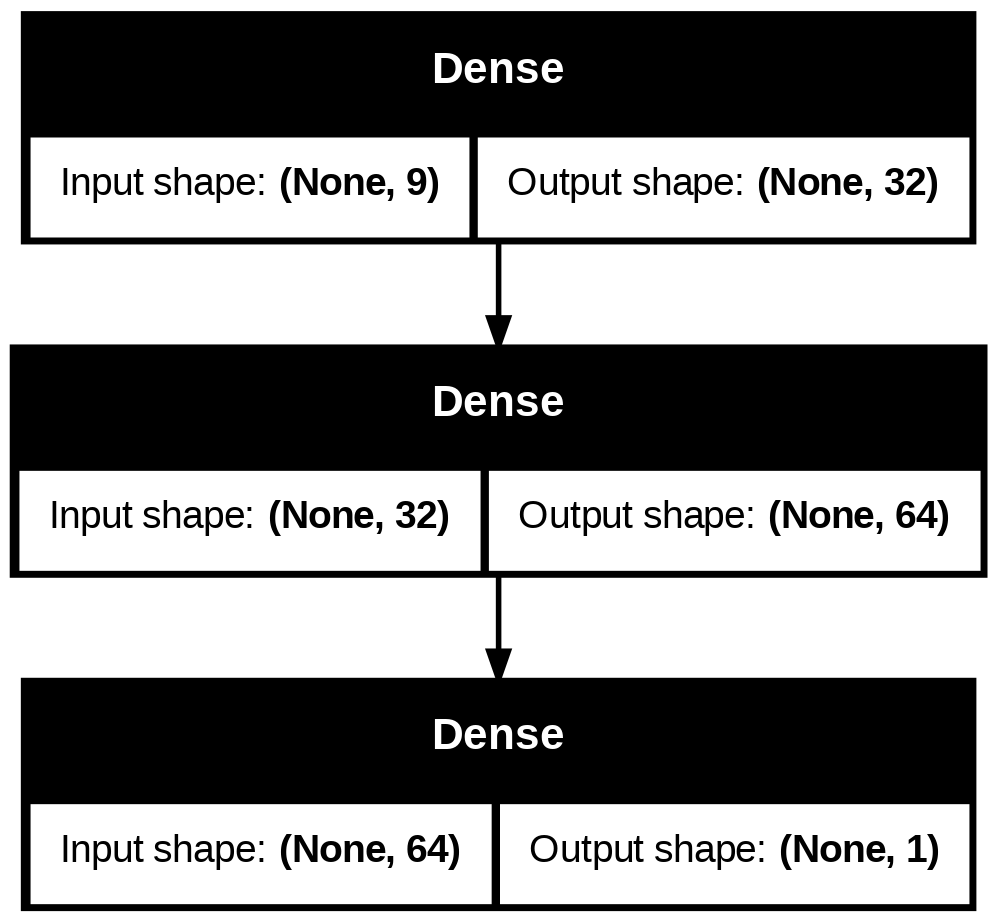

In [70]:
keras.utils.plot_model(model_relu_64, 'model_relu_64_shapes.png', show_shapes=True)

In [71]:
!ls *.png

model_relu_64.png  model_relu_64_shapes.png


### Training model

In [72]:
n_epochs = 1000

training_hist = model_relu_64.fit(x_train,
                                  y_train,
                                  epochs = n_epochs,
                                  validation_split = 0.2,
                                  verbose = True)

Epoch 1/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 306855520.0000 - mae: 13028.1885 - mse: 306855520.0000 - val_loss: 336112416.0000 - val_mae: 12877.1074 - val_mse: 336112416.0000
Epoch 2/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 320360512.0000 - mae: 13282.3037 - mse: 320360512.0000 - val_loss: 336055904.0000 - val_mae: 12875.1074 - val_mse: 336055904.0000
Epoch 3/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322622944.0000 - mae: 13467.5996 - mse: 322622944.0000 - val_loss: 335926944.0000 - val_mae: 12870.6611 - val_mse: 335926944.0000
Epoch 4/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 330040288.0000 - mae: 13614.5049 - mse: 330040288.0000 - val_loss: 335652448.0000 - val_mae: 12861.4629 - val_mse: 335652448.0000
Epoch 5/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 329052896.0000 - mae: 13770.3887 - mse: 329052896.0000 - val_loss: 335138944.0000 - val_mae: 12844.6113 - val_mse: 335138944.0000
Epoch 6/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [73]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,20694416.0,2710.843506,20694416.0,22118742.0,2759.399414,22118742.0,995
996,20711136.0,2725.462891,20711136.0,22159262.0,2783.103027,22159262.0,996
997,20691980.0,2721.357178,20691980.0,22132310.0,2769.019043,22132310.0,997
998,20691922.0,2704.442383,20691922.0,22165422.0,2773.328369,22165422.0,998
999,20676672.0,2717.934082,20676672.0,22203066.0,2788.027100,22203066.0,999


In [74]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

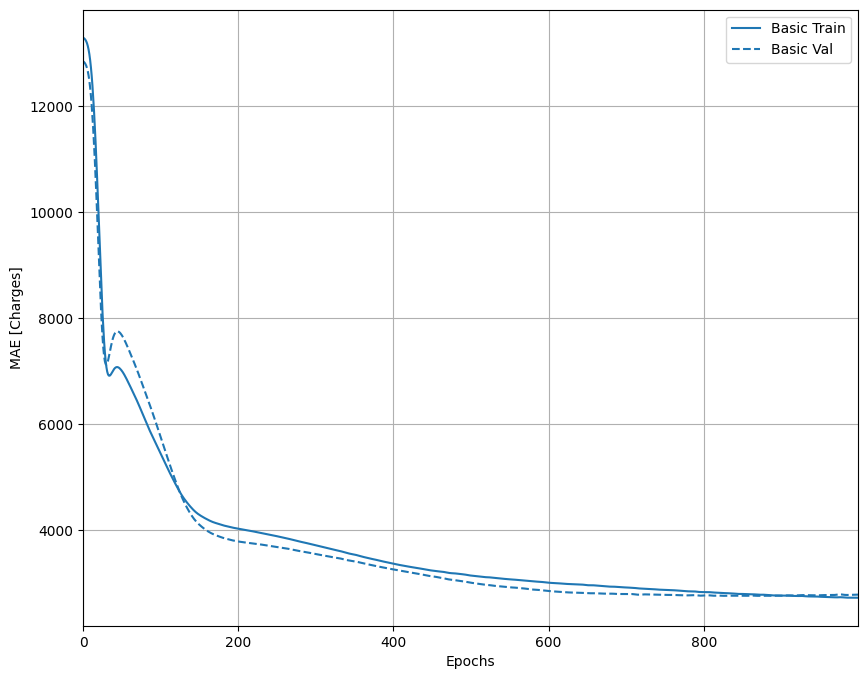

In [75]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mae")

plt.ylabel('MAE [Charges]')
plt.show()

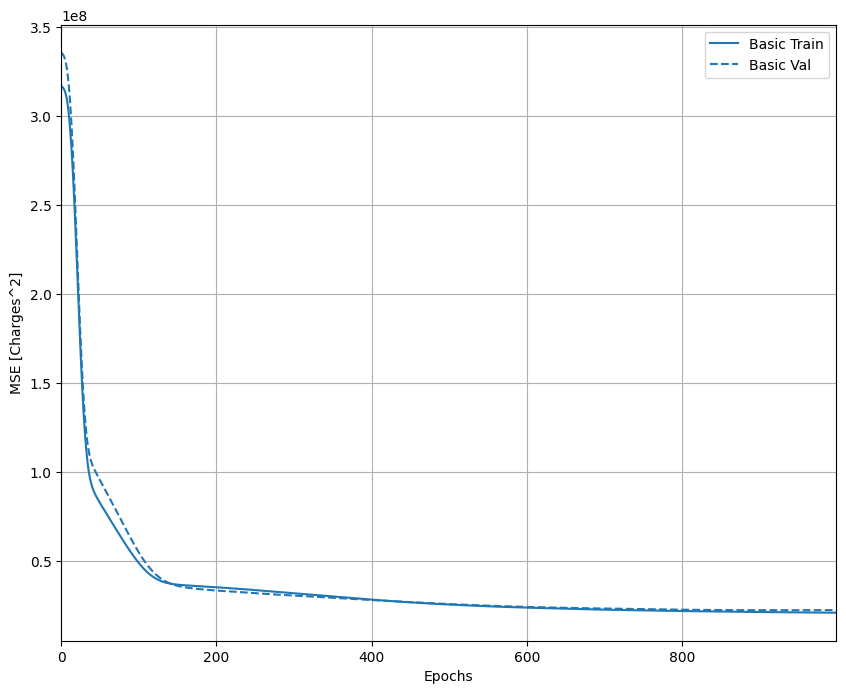

In [76]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mse")

plt.ylabel('MSE [Charges^2]')
plt.show()

### Plotting scatter plot for actual and predicted charges

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


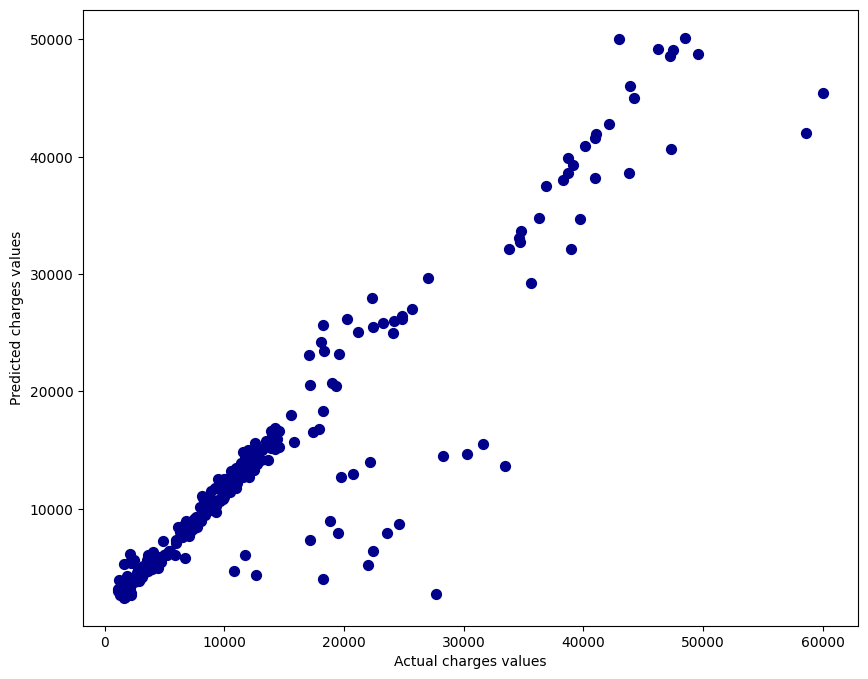

In [78]:
y_pred = model_relu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=50, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [79]:
r2_score(y_test, y_pred)

0.8683499097824097

### Building model with relu activation function

In [80]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='elu', input_shape=[len(x_train.keys())]),
        layers.Dropout(0.2),
        layers.Dense(64, activation='elu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [81]:
model_elu_64 = build_model()

model_elu_64.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

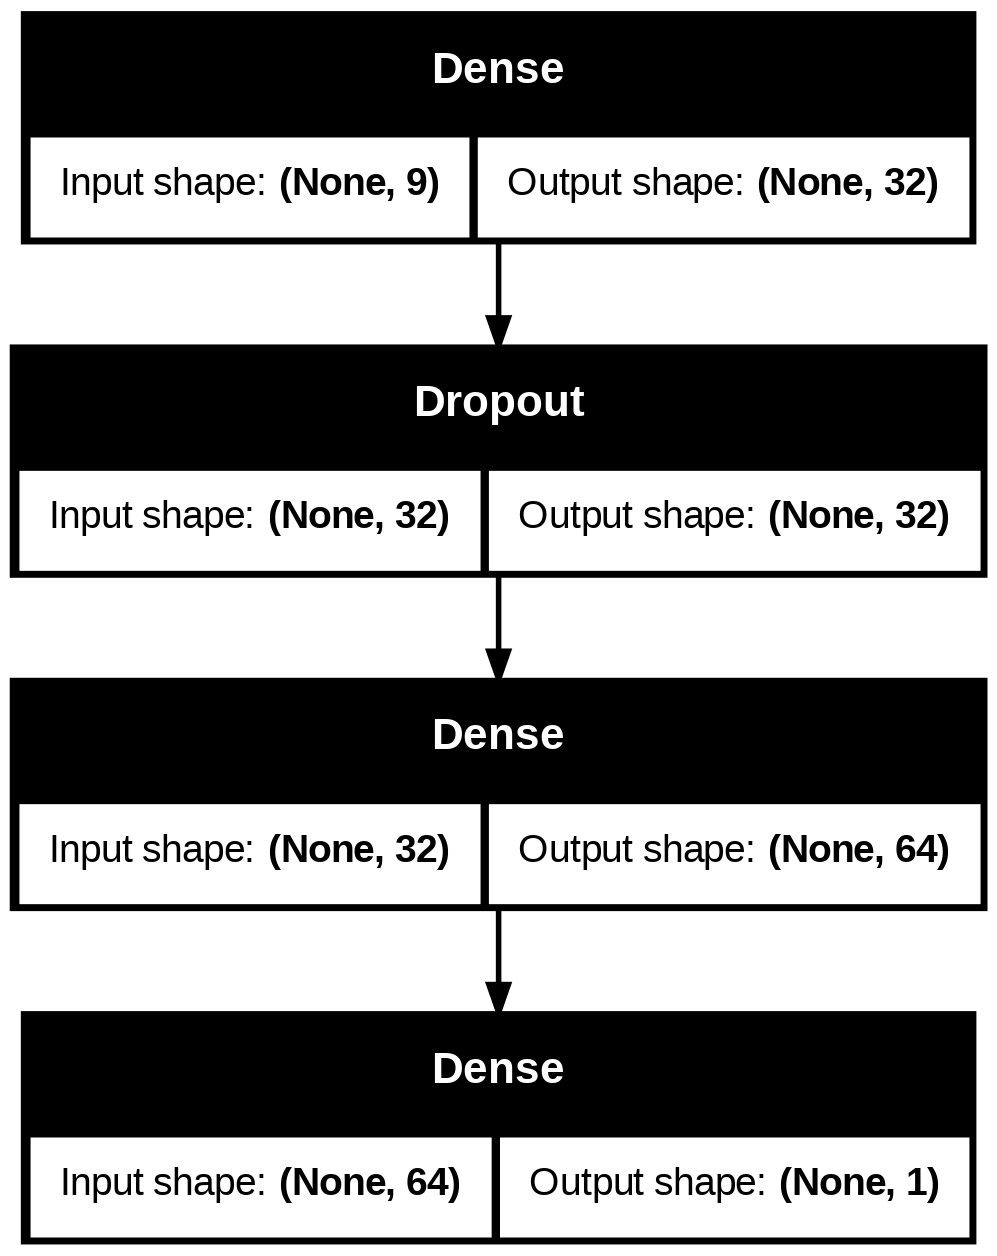

In [82]:
keras.utils.plot_model(model_elu_64, 'model_elu_64_shapes.png', show_shapes=True)

### Training model (build with elu activation function and dropout)

In [83]:
training_hist= model_elu_64.fit(x_train,
                                y_train,
                                epochs = n_epochs,
                                validation_split = 0.2,
                                verbose = False,
                                callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317058656.0000,  mae:13317.8408,  mse:317058656.0000,  val_loss:336096576.0000,  val_mae:12877.0420,  val_mse:336096576.0000,  
....................................................................................................
Epoch: 100, loss:52341812.0000,  mae:5114.8125,  mse:52341812.0000,  val_loss:51182088.0000,  val_mae:5064.9165,  val_mse:51182088.0000,  
....................................................................................................
Epoch: 200, loss:35602728.0000,  mae:4018.8328,  mse:35602728.0000,  val_loss:24541012.0000,  val_mae:2958.6174,  val_mse:24541012.0000,  
....................................................................................................
Epoch: 300, loss:31191488.0000,  mae:3790.0918,  mse:31191488.0000,  val_loss:23527624.0000,  val_mae:2777.0002,  val_mse:23527624.0000,  
....................................................................................................
Epoch: 400, loss:31251098.0000,  ma

In [84]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,27965492.0,3452.909668,27965492.0,22505672.0,2720.820068,22505672.0,995
996,28142650.0,3528.592773,28142650.0,22492034.0,2727.849609,22492034.0,996
997,27433004.0,3463.476074,27433004.0,22513784.0,2693.677002,22513784.0,997
998,26653376.0,3339.338867,26653376.0,22504558.0,2691.781250,22504558.0,998
999,27435394.0,3394.794189,27435394.0,22503306.0,2729.879639,22503306.0,999


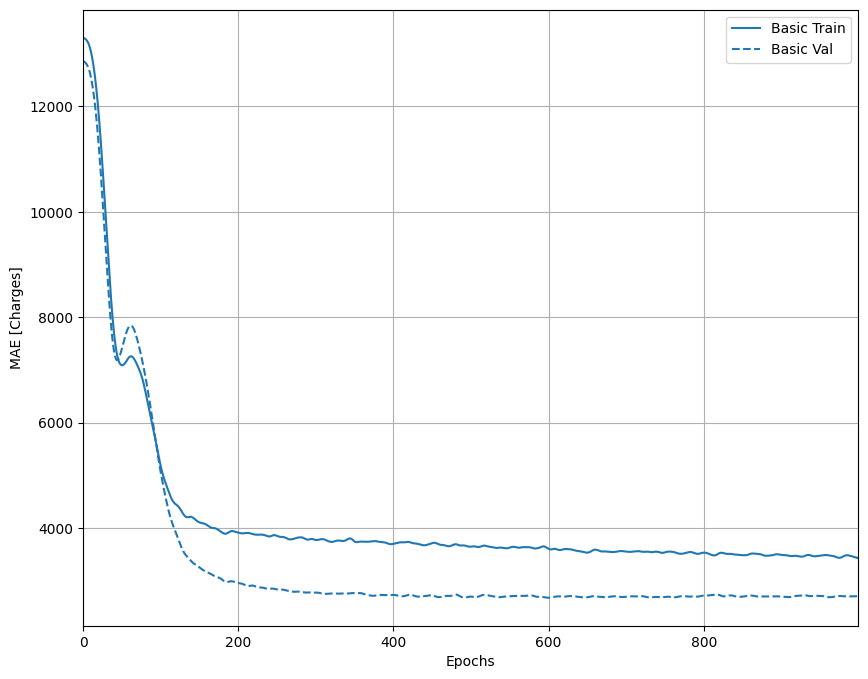

In [85]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mae")

plt.ylabel('MAE [Charges]')
plt.show()

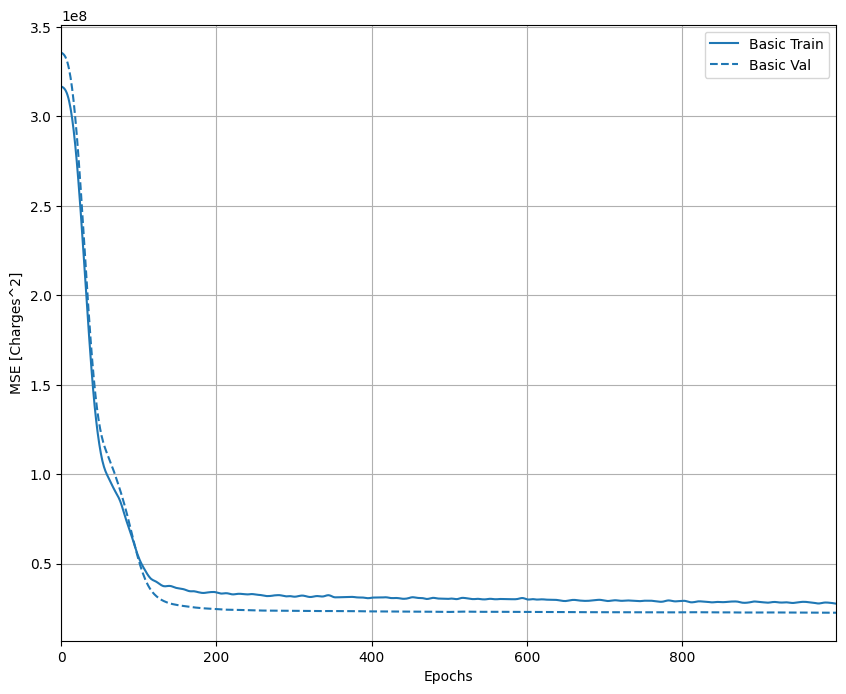

In [86]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mse")

plt.ylabel('MSE [Charges^2]')
plt.show()

In [87]:
model_elu_64.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25081438.0000 - mae: 2880.4375 - mse: 25081438.0000 


[22357462.0, 2785.3046875, 22357462.0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


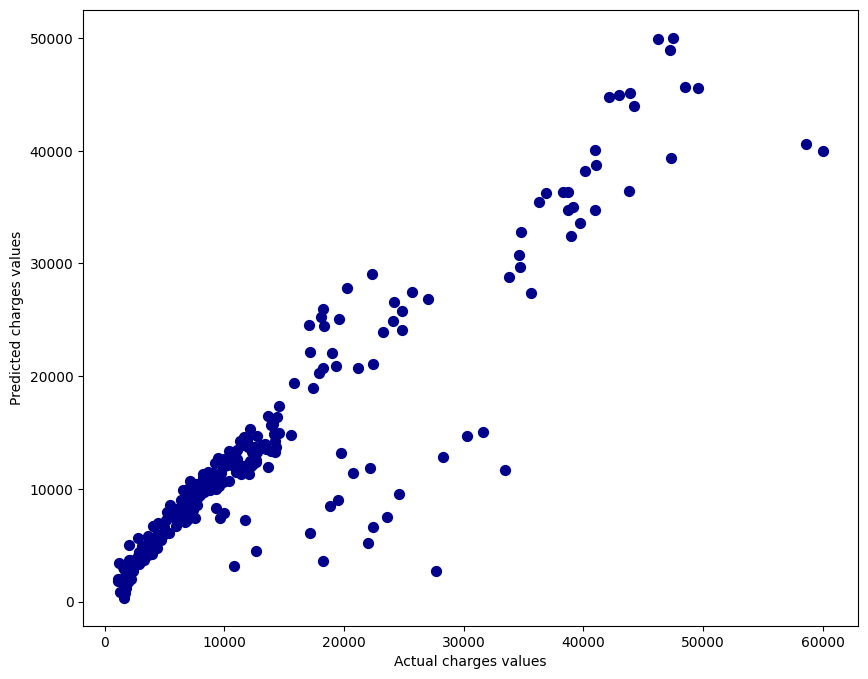

In [88]:
y_pred = model_elu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=50, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [89]:
r2_score(y_test, y_pred)

0.8502320051193237

### Building model with Earlystopping callback

In [90]:
model_relu_with_ES = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

training_history = model_relu_with_ES.fit(x_train,
                                       y_train,
                                       epochs=n_epochs,
                                       validation_split = 0.2,
                                       verbose=False,
                                       callbacks=[early_stop, tfdocs.modeling.EpochDots()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch: 0, loss:317059424.0000,  mae:13317.7207,  mse:317059424.0000,  val_loss:336093344.0000,  val_mae:12876.7451,  val_mse:336093344.0000,  
....................................................................................................
Epoch: 100, loss:50050252.0000,  mae:5050.4463,  mse:50050252.0000,  val_loss:48256148.0000,  val_mae:5066.5840,  val_mse:48256148.0000,  
....................................................................................................
Epoch: 200, loss:32679350.0000,  mae:3928.7856,  mse:32679350.0000,  val_loss:24552498.0000,  val_mae:3030.2571,  val_mse:24552498.0000,  
....................................................

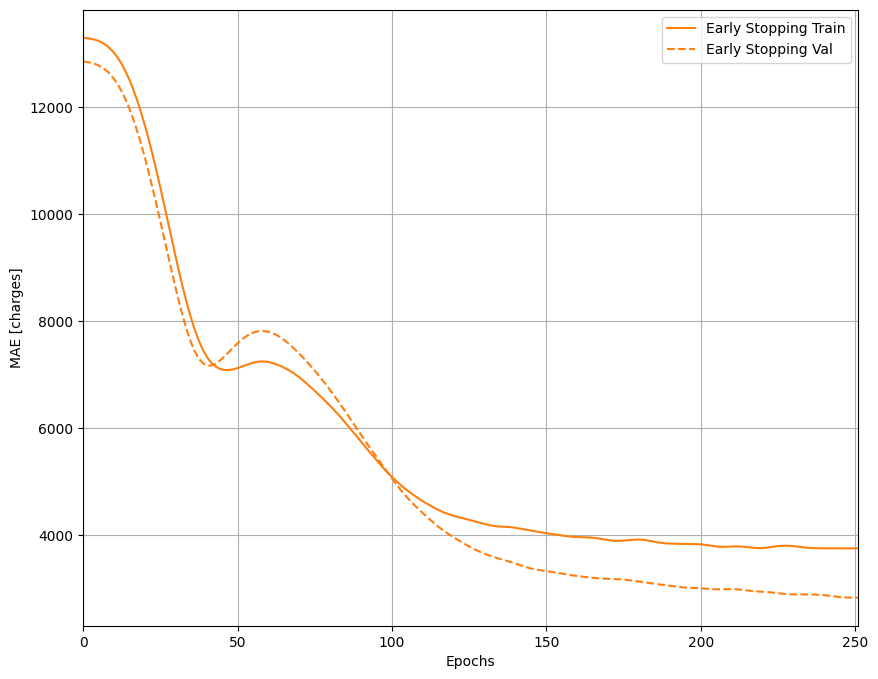

In [91]:
plt.figure(figsize=(10, 8))

plotter.plot({'Early Stopping': training_history}, metric = "mae")

plt.ylabel('MAE [charges]')
plt.show()

In [92]:
model_relu_with_ES.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27234944.0000 - mae: 3047.1431 - mse: 27234944.0000 


[23991350.0, 2916.746826171875, 23991350.0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


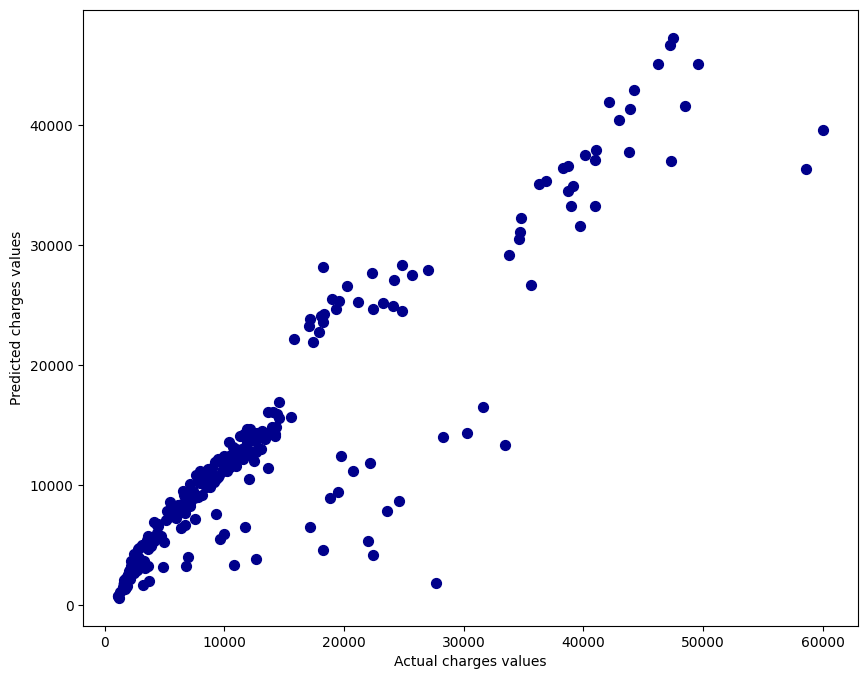

In [94]:
y_pred = model_relu_with_ES.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=50, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [95]:
r2_score(y_test, y_pred)

0.8392869830131531

In [96]:
model_relu_with_ES.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,493 (29.27 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,996 (19.52 KB)

In [99]:
model_relu_with_ES.save_weights("./relu_64_weights.weights.h5")

In [101]:
!ls

model_elu_64_shapes.png  model_relu_64_shapes.png    sample_data
model_relu_64.png	 relu_64_weights.weights.h5


In [102]:
model_relu_with_ES.save_weights("./relu_64_weights.h5", save_format="h5")

TypeError: Model.save_weights() got an unexpected keyword argument 'save_format'

In [103]:
!ls

model_elu_64_shapes.png  model_relu_64_shapes.png    sample_data
model_relu_64.png	 relu_64_weights.weights.h5


In [104]:
relu_64_json = model_relu_with_ES.to_json()

pprint.pprint(json.loads(relu_64_json))

{'build_config': {'input_shape': [None, 9]},
 'class_name': 'Sequential',
 'compile_config': {'jit_compile': False,
                    'loss': 'mse',
                    'loss_weights': None,
                    'metrics': ['mae', 'mse'],
                    'optimizer': {'class_name': 'Adam',
                                  'config': {'amsgrad': False,
                                             'beta_1': 0.9,
                                             'beta_2': 0.999,
                                             'clipnorm': None,
                                             'clipvalue': None,
                                             'ema_momentum': 0.99,
                                             'ema_overwrite_frequency': None,
                                             'epsilon': 1e-07,
                                             'global_clipnorm': None,
                                             'gradient_accumulation_steps': None,
                                

In [ ]:
with open('./my_models/relu_64_config.json', 'w') as outfile:

    outfile.write(relu_64_json)

In [ ]:
!cat my_models/relu_64_config.json

{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "batch_input_shape": [null, 9], "dtype": "float32", "units": 32, "activation": "elu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_1", "trainable": true, "dtype": "float32", "rate": 0.2, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 64, "activation": "elu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regu

### Saving entire model

In [ ]:
model_relu_with_ES.save("./my_models/relu_64_config_weights")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./my_models/relu_64_config_weights/assets


In [ ]:
!ls my_models/relu_64_config_weights

assets         saved_model.pb variables
